In [4]:
import sys
import numpy as np
import pandas as pd
import nibabel
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def versions():
    print("Python version:\n{}\n".format(sys.version))
    print("matplotlib version: {}".format(matplotlib.__version__))
    print("pandas version: {}".format(pd.__version__))
    print("numpy version: {}".format(np.__version__))
    print("seaborn version: {}".format(sns.__version__))
    print("nibabel version: {}".format(nibabel.__version__))

versions()

Python version:
3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]

matplotlib version: 2.2.0
pandas version: 0.22.0
numpy version: 1.14.1
seaborn version: 0.8.1
nibabel version: 2.1.0


###### Boxplot

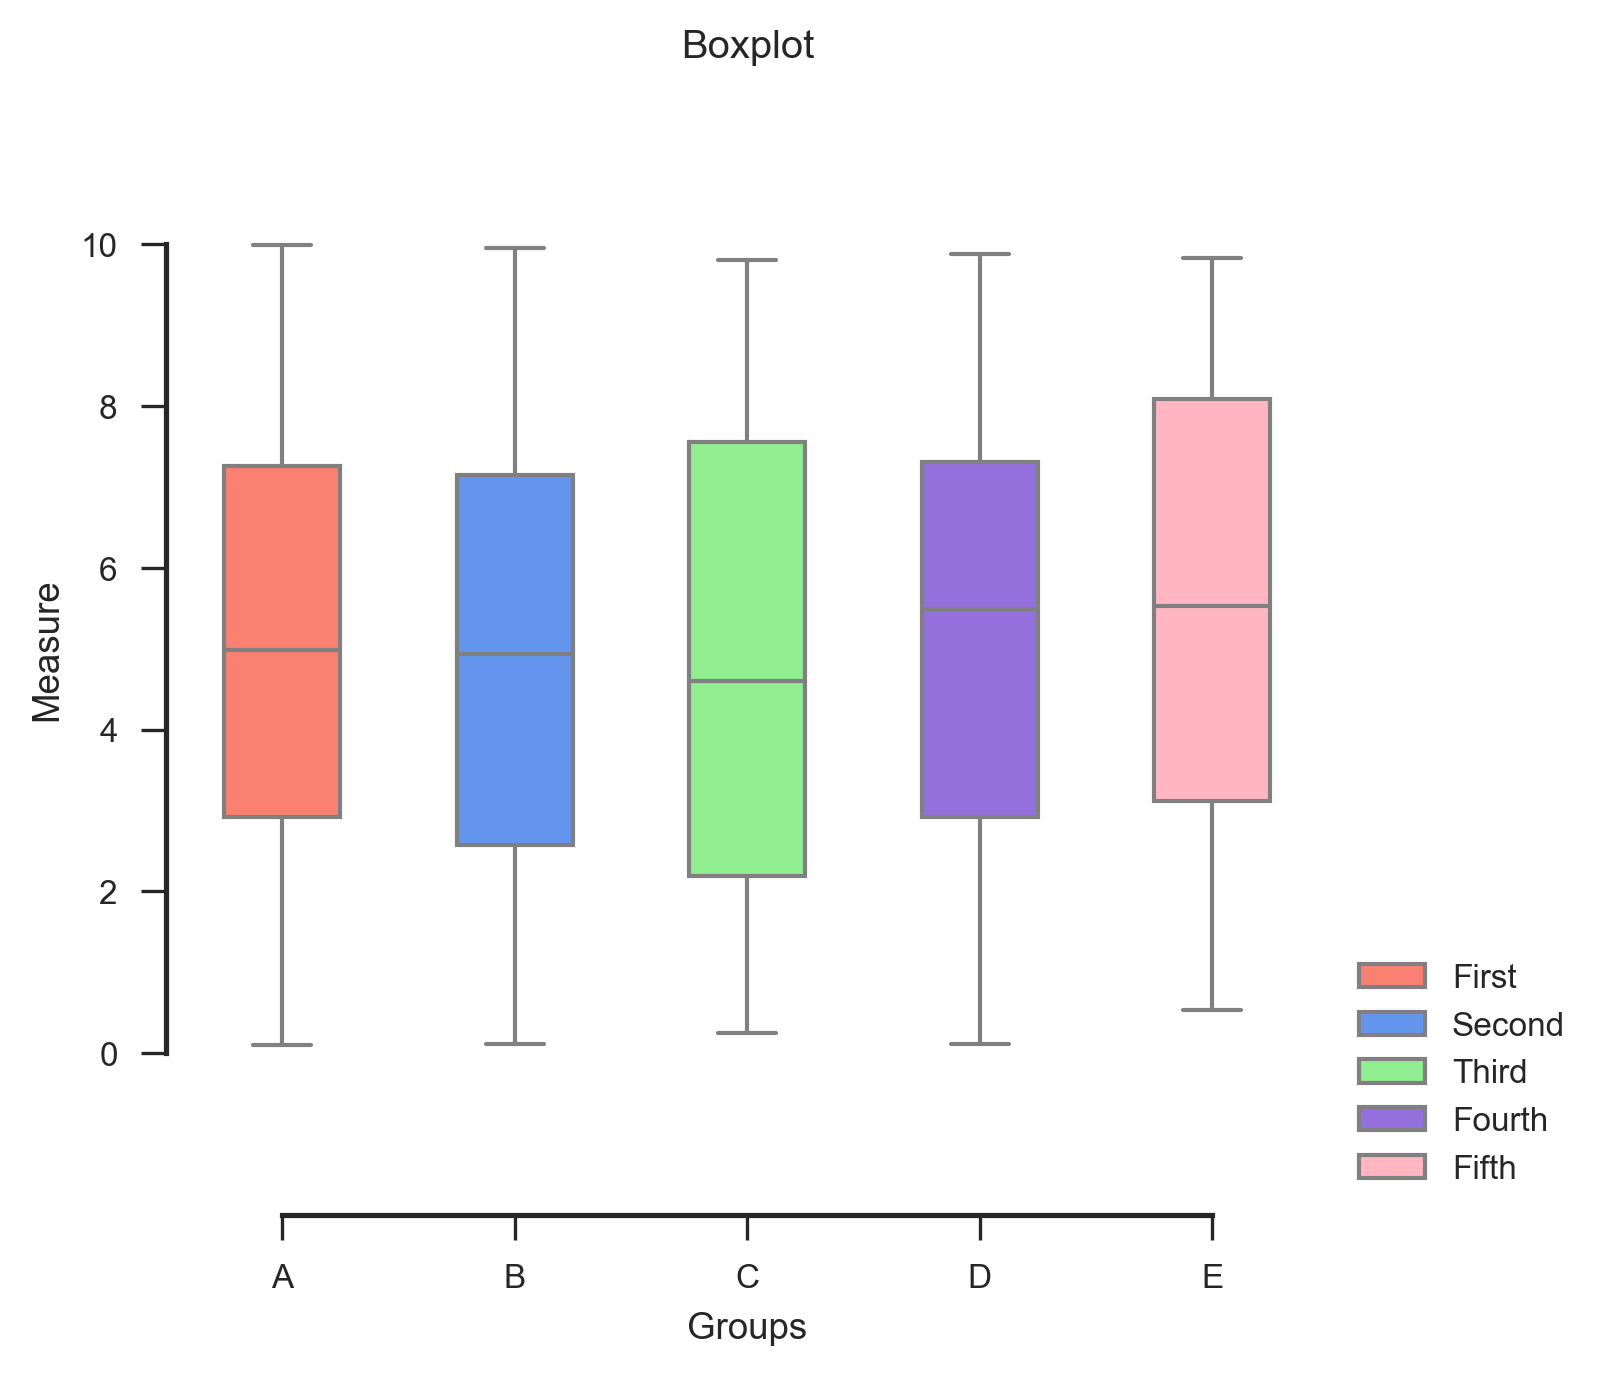

In [5]:
# make up data
data = np.random.uniform(0, 10, [100, 5])

# set style
plt.style.use(['seaborn-paper', 'seaborn-ticks'])

# make a figure
nrows=1
ncols=1
width=5
height=5
dpi=300
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height), dpi=dpi, 
                       sharex=False, sharey=False, facecolor='w', frameon=False)

# boxplot
boxprops = dict(linewidth=1, color='gray')
medianprops = dict(linewidth=1, color='gray')
capprops = dict(linewidth = 1, color='gray')
whiskerprops = dict(linewidth=1, color='gray')
flierprops = dict(marker='.', markerfacecolor='gray', markersize=2)
bp = ax.boxplot(data, patch_artist=True, 
                boxprops=boxprops, medianprops=medianprops, capprops=capprops, whiskerprops=whiskerprops, 
                flierprops=flierprops)
# set title
ax.set_title('Boxplot')
# set x axis label
ax.set_xlabel('Groups')
#set y axis label
ax.set_ylabel('Measure')
#set y axis limits
ax.set_ylim(-2, 12)
# set x tick labels
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])
# set y tick shown
ax.set_yticks([0, 2, 4, 6, 8, 10])
# set the bounds of the y axis
ax.spines['left'].set_bounds(0, 10)
ax.spines['bottom'].set_bounds(1,5)
# turn off spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#set color or boxes
box_colors=['salmon', 'cornflowerblue', 'lightgreen', 'mediumpurple', 'lightpink']
for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
# add a legned
labels=['First', 'Second', 'Third', 'Fourth', 'Fifth']
plt.legend(bp['boxes'], labels, loc="lower left", bbox_to_anchor=(1, 0))

#save figure out
fname='/Users/snyderkm/Desktop/test.svg'
plt.savefig(fname, dpi=600, facecolor=None, edgecolor=None, transparent=True, 
           frameon=False, bbox_inches='tight')

###### Line plot

In [11]:
# make up data
x = np.arange(0.0, 1.0, 0.1)
y = np.exp(x)

###### Image

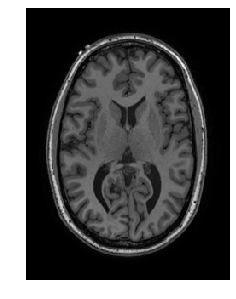

In [50]:
# load in T1 scan, convert to double, and select axial slice
t1_file='/Volumes/shares/EEG/EIG/Projects/Morphometric_MRI/Multicontrast_MRI/MRI_corrected/hv1/ct1.nii'
z = 160
t1 = nibabel.load(t1_file).get_data()
data = t1.astype(np.double)[:,z,::-1]

# set style
plt.style.use(['seaborn-white', 'seaborn-paper'])

# make a figure
nrows=1
ncols=1
width=5
height=5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height),
                       sharex=False, sharey=False, facecolor='w', frameon=False)

# display image
ax.imshow(data, cmap='gray', interpolation='nearest')

# turn off axis
ax.axis('off')

plt.show()